# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
    - raw 데이터가 저장된 형태가 여러가지이므로 여러가지 클래스가 있는것 이다. // 메모리에 있는경우from_tensor_slices()를씀
2. 데이터셋 변형: map():데이터 원소를 바꾸는~, filter():조건에 맞는 데이터를 갖고 오는, batch() 등 메소드를 이용해 데이터 소스를 변형한다.
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.

- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.=>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

# 데이터 feeding에 관한  여러 설정들 

In [1]:
import tensorflow as tf
import numpy as np

In [28]:
arr = np.arange(9) # 0~8까지 9개배열// 메모리에 원소가 9개인 배열데이터가 있는것 /불러와서 이미 메모리에 있는데이터셋이라고 생각

In [29]:
# 메모리에 ndarray로 저장된 데이터를 이용해 Dataset 객체를 생성
dataset = tf.data.Dataset.from_tensor_slices(arr)  # 데이터 종류에 따라 메서드 바뀜
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [30]:
# 각각 원소를 변환 작업을 Dataset 추가 - Dataset.map(변환함수) :변환!!!!!!!!!!!!!!!!!!!!! map
dataset = dataset.map(lambda x : x**2)
type(dataset)  # map이 적용된 dataset 

tensorflow.python.data.ops.dataset_ops.MapDataset

In [31]:
#dataset = dataset.filter(lambda x : x%2==0) # 2의 배수만 걸러내기 !!!!!!!!!!!!!!!!!!!!!! filter /ndarray 읽기 , 변환map, filter,  조회

In [32]:
dataset = dataset.shuffle(9)  # data 섞는 작업 해줘 // ndarray 읽기 , 변환map, 섞기shuffle  조회, epoch당 1번 shuffle
# 가능하다면 데이터 크기와 동일하게 주는게 좋다.메모리의 크기에따라 괄호안에 숫자 지정하기!

In [33]:
dataset = dataset.batch(3) # 한번에 지정한 개수(3) 만큼 제공 // 다시설정하면 위에서부터 다시 작동시켜야함 

In [34]:
for a in dataset:
    print(a)

tf.Tensor([ 1 49 25], shape=(3,), dtype=int32)
tf.Tensor([ 4 36 64], shape=(3,), dtype=int32)
tf.Tensor([ 9 16  0], shape=(3,), dtype=int32)


In [27]:
# Dataset에서 제공되는 값들을 조회f
for a in dataset:
    print(a)

tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)


In [35]:
x = np.arange(10)
y = np.arange(10,20)
x.shape, y.shape

((10,), (10,))

In [36]:
ds = tf.data.Dataset.from_tensor_slices((x,y)) # 데이터 원소의 개수가 같아야 묶어서 읽는거 가능 


In [39]:
for a in ds:
    print(a)
     # tf.tensor 로 나옴 자료구조가 tensor임 // zip과 같은 느낌으로 보면 됨!

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=6>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=7>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [40]:
ds2= ds.map(lambda x, y : (x**2,y**3)) # x:2제곱 , y: 3제곱 하고싶음 // y를 그대로 하고 싶으면 그냥 y를 넣으면 되고 생략해서는 안된다.

# def map_func(x,y) # dataset에 두개의 배열을 넣었을 경우 변수 두개로 가각 받는다.
#     return x**2 , y**3

In [42]:
for a in ds2:
    print(a)
    

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)


In [43]:
ds3 = ds2.shuffle(10) # 짝은 맞춰 져 있고 index가 바뀐다고 생각해~~~!


In [44]:
for a in ds3:
    print(a)


(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)


In [45]:
ds4 = ds2.batch(4)

In [46]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)


In [49]:
for a in ds4.repeat(3): # dataset.repeat(count) : count횟수만큼 반복, count 생략 시 무한이제공한다.
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

In [51]:
# 위에서 사용했던거 한번에 사용해서 dataset만들기 
dataset = tf.data.Dataset.from_tensor_slices((x,y)).map(lambda x, y : (x**2,y**3)).shuffle(10).batch(4).repeat(3)

In [52]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25, 36,  1, 81])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 4096, 1331, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4,  0, 49, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 1000, 4913, 2744])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 64])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 5832])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([49,  0, 64, 16])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4913, 1000, 5832, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  9,  1,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 2197, 1331, 1728])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([81, 36])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6859, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 25,  1, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 3375, 1331, 5832])>)
(<tf.Tensor

In [ ]:
# tensorflow type : 넘파이 배열과 호환이 된다.// 그래서 내부적으로 텐서타입으로 바꿔서 작업된다. 

# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [17]:
# random seed 설정.
np.random.seed(1)
tf.random.set_seed(1)

In [18]:
# 데이터셋 로딩
(X_train,y_train),(X_test,y_test) = keras.datasets.boston_housing.load_data()
X_train.shape,X_test.shape  # 작은 데이터 이기때문에 deeplearn성능은 안좋을...

((404, 13), (102, 13))

In [19]:
y_train[:5]  # 회귀(regression)

array([15.2, 42.3, 50. , 21.1, 17.7])

In [20]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [21]:
# 하이퍼파라미터 값들을 설정 // 한번에 변수와 하이퍼파라미터를 조절하기위해서 변수 지정하고 사용하는게 좋다.
LEARNING_RATE = 0.001  # 학습률
N_EPOCHS = 200         # 에폭 횟수. 1epoch 전체 데이터셋 한번 사용한것.
N_BATCHS = 32          # batch_size 32개 데이터셋 마다 파라미터들(가중치) 업데이트.

N_TRAIN = X_train.shape[0] # train set의 개수를 뽑아 //필요한 변수를 미리뽑은것 /// x_TRAIN 의 데이터 개수를 사용하기위해서 
N_TEST = X_test.shape[0] # test set의 개수 뽑기위해 //필요한 변수를 미리뽑은것
N_FEATURES = X_train.shape[1] # input data의 feature(컬럼) 개수   //필요한 변수를 미리뽑은것

In [22]:
# Dataset 생성 // 1epoch 당 한번씩 셔플 한다//
# drop_remainder = True : 마지막에 batch_size보다 제공할 데이터가 적으면 학습시 제공하지 말고 버려라.drop하라는 뜻 
# 일정한 batch사이즈로 학습하다가 줄어버리면 그거에 영향을 받을 수 있어서drop 함. 하지만 shuffle때문에 학습은 된다.
# repeat() : 여러 epoch을 돌때마다 계속 데이터를 제공하게 하기 위해. repeat을 지정하지 않으면 1에폭 후 데이터를 제공하지 못한다.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder = True).repeat()
#.batch(N_BATCHS): 배치단위로 메모리에 읽어온다.// 메모리 상황에 맞게 배치사이즈 지정하면된다.(비정형데이터 같은경우 용량이 크니까)
# 한번에 많은 데이터를 메모리에 읽어오면 메모리에 무리가 생김...

val_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(N_BATCHS) #???? 검증만 하니까 한번만 제대로 나오면 되니까 설정별로없음
## test셋도 val과 비슷하게 만들면 된..

In [23]:
# 모델 생성
def create_model():
    model = keras.Sequential()  # 모델 객체.생성// 입력층을 안만들었음 // 첫번째 은닉층을 만들때
    # 두가지 방법이있다.
    # 1.입력 layer를 따로 정의.
    # 2.첫번째 layer를 만들때 input_shape(입력데이터를 형태)를 지정하면 입력 layer층이 자동으로 생성된다.
    # flatten 해야할 경우 그냥 1번 방법으로 진행하면됨
    model.add(keras.layers.Dense(units = 16, activation= 'relu', input_shape = (N_FEATURES,))) #input_shape = (N_FEATURES,)튜플로 지정해야함..//1개데이터의 shape
    model.add(keras.layers.Dense(units = 8, activation = 'relu'))
    # 출력 layer
    model.add(keras.layers.Dense(units = 1)) # 회귀의 출력층 : unit = 1 //  activation 함수는 사용하지 않는다.
    
# 모델 컴파일 
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= LEARNING_RATE), # optimizer의 하이퍼파라미터를 기본값으로 쓸경우 문자열로 "adam"으로 선언하면 됨.
                  loss = 'mse') #회귀의 loss 함수 : mse 를 주로 사용한다. // metrics도 mse를 사용하기 때문에 따로 설정하지 않는다.
    
    return model

In [24]:
X_train.shape #(데이터 개수, 크기)

(404, 13)

In [25]:
model = create_model()

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 1에폭 : 전체 train 데이터 한번 학습// 트레인 데이터에서 batch 사이즈만큼 모델을 지나서 예측결과를 얻은후 오차를 토대로 업데이트가 진행되니까// 
#트레인 데이터/배치사이즈 만큼 step을 하게 된다.**스텝(Step): 한번 파라미터를 업데이트하는 단위 
steps_per_epoch = N_TRAIN//N_BATCHS # 총 step 수가 나온 // dropremainder를 True로  햇으니까 몫만 필요해서  '//'를 햇음 # 학습데이터개수/배치수 

# validation
validation_steps = int(np.ceil(N_TEST / N_BATCHS))  # 올림하면  .0 때문에 실수니까 정수로 바꾸기

In [28]:
history = model.fit(train_dataset, # 학습데이터셋 (x_train,y_train) 
                      epochs = N_EPOCHS,
                      steps_per_epoch= steps_per_epoch, #1 에폭당 step수////1step :한번 가중치 업데이트 /tf2.4부터는 생략가능
                      validation_data = val_dataset, # 검증데이터셋 지정.
                      validation_steps = validation_steps)
# 한번 에폭완료 후 train data를 shuffle하고 배치사이즈만큼 모델에 던지고 그다음 에폭후 셔플,배치사이즈 만큼 던지고... 에폭 횟수 끝날때까지..repeat

Train for 12 steps, validate for 4 steps
Epoch 1/200
12/12 [==============================] - 0s 36ms/step - loss: 402.1756 - val_loss: 239.0792
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 151.8999 - val_loss: 120.9074
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 81.3070 - val_loss: 104.4386
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 77.1330 - val_loss: 99.5287
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 73.2870 - val_loss: 102.3875
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 73.6594 - val_loss: 96.8372
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 68.5961 - val_loss: 105.7052
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 68.1735 - val_loss: 96.7148
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 64.4891 - val_loss: 99.6242
Epoch 10/200
12/12 [======================

Epoch 81/200
12/12 [==============================] - 0s 3ms/step - loss: 40.6395 - val_loss: 53.9089
Epoch 82/200
12/12 [==============================] - 0s 3ms/step - loss: 41.8409 - val_loss: 63.6541
Epoch 83/200
12/12 [==============================] - 0s 3ms/step - loss: 41.3783 - val_loss: 53.3382
Epoch 84/200
12/12 [==============================] - 0s 3ms/step - loss: 39.6774 - val_loss: 55.3795
Epoch 85/200
12/12 [==============================] - 0s 3ms/step - loss: 41.2063 - val_loss: 53.4620
Epoch 86/200
12/12 [==============================] - 0s 3ms/step - loss: 40.0407 - val_loss: 50.9151
Epoch 87/200
12/12 [==============================] - 0s 3ms/step - loss: 35.3876 - val_loss: 57.0341
Epoch 88/200
12/12 [==============================] - 0s 3ms/step - loss: 40.0828 - val_loss: 55.3768
Epoch 89/200
12/12 [==============================] - 0s 3ms/step - loss: 41.4325 - val_loss: 53.9549
Epoch 90/200
12/12 [==============================] - 0s 3ms/step - loss: 36.9179 

12/12 [==============================] - 0s 3ms/step - loss: 33.3250 - val_loss: 42.3829
Epoch 161/200
12/12 [==============================] - 0s 3ms/step - loss: 33.8451 - val_loss: 43.0780
Epoch 162/200
12/12 [==============================] - 0s 2ms/step - loss: 34.4304 - val_loss: 42.0786
Epoch 163/200
12/12 [==============================] - 0s 3ms/step - loss: 33.9570 - val_loss: 42.5185
Epoch 164/200
12/12 [==============================] - 0s 3ms/step - loss: 35.2657 - val_loss: 42.1647
Epoch 165/200
12/12 [==============================] - 0s 3ms/step - loss: 35.4410 - val_loss: 42.4210
Epoch 166/200
12/12 [==============================] - 0s 3ms/step - loss: 33.9625 - val_loss: 42.6780
Epoch 167/200
12/12 [==============================] - 0s 3ms/step - loss: 34.1748 - val_loss: 43.0065
Epoch 168/200
12/12 [==============================] - 0s 3ms/step - loss: 36.5509 - val_loss: 43.5831
Epoch 169/200
12/12 [==============================] - 0s 3ms/step - loss: 32.7472 - va

In [31]:
history.history.keys() # 딕셔너리로 반환해준다~~!

dict_keys(['loss', 'val_loss'])

In [32]:
history.history  # 딕셔너리로 반환해준다~~!

{'loss': [402.1755714416504,
  151.8999080657959,
  81.30701160430908,
  77.13301118214925,
  73.28703467051189,
  73.65941619873047,
  68.59605550765991,
  68.17346239089966,
  64.48908138275146,
  64.8098824818929,
  65.43766578038533,
  62.97398026784261,
  63.70985635121664,
  65.03363641103108,
  63.968371550242104,
  62.03939040501913,
  62.409614404042564,
  59.52605644861857,
  61.34282080332438,
  58.386757691701256,
  59.823924700419106,
  60.44420623779297,
  57.643933137257896,
  58.558788458506264,
  55.61461035410563,
  55.175479571024574,
  56.72218449910482,
  55.2426438331604,
  56.00656016667684,
  55.081990242004395,
  54.414416472117104,
  53.56959597269694,
  51.94300206502279,
  50.852795441945396,
  52.05717945098877,
  56.36387538909912,
  58.05383268992106,
  55.84691349665324,
  50.77808666229248,
  50.52508211135864,
  50.231220960617065,
  51.10897922515869,
  47.1106162071228,
  46.91719579696655,
  49.16593964894613,
  49.584521770477295,
  49.956803957621

In [33]:
history.history['val_loss']

[239.07921409606934,
 120.90739154815674,
 104.43864727020264,
 99.52873229980469,
 102.38753890991211,
 96.83716106414795,
 105.70520973205566,
 96.71477127075195,
 99.62417411804199,
 94.79558277130127,
 93.51691913604736,
 92.28505611419678,
 90.681396484375,
 90.34867191314697,
 90.38856506347656,
 88.61078262329102,
 93.47032928466797,
 85.18064308166504,
 86.07576370239258,
 86.59419918060303,
 83.04612731933594,
 81.00098419189453,
 86.80790615081787,
 80.00780963897705,
 80.80056667327881,
 86.52716541290283,
 76.9068832397461,
 80.47087955474854,
 76.23849487304688,
 81.33969497680664,
 74.79212665557861,
 79.9434871673584,
 74.42268657684326,
 74.46122074127197,
 72.39503479003906,
 75.09574317932129,
 72.71757221221924,
 85.84942531585693,
 71.20319080352783,
 69.44615173339844,
 71.20471668243408,
 72.69189643859863,
 69.04610443115234,
 68.45055294036865,
 67.5604362487793,
 66.64585781097412,
 67.44141960144043,
 66.82737159729004,
 67.03874111175537,
 64.61459159851074,


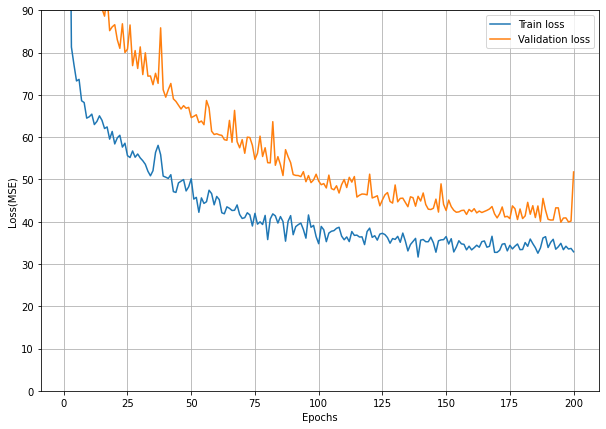

In [34]:
# epoch당 loss와 val_loss 변화에 대해 선그래프 그리기.---> 파라미터 조절을 위해서 항상그려봐야함 ... 
import matplotlib.pyplot as plt
plt.figure(figsize =(10,7))
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label = 'Train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label = 'Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.ylim(0,90)
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#평가
model.evaluate(val_dataset) # 

4/4 [==============================] - 0s 2ms/step - loss: 51.7618


51.76176357269287

## 2. Classification

### Fashion MNIST(MNIST) Dataset - 다중분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [32]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [34]:
#데이터 셋 읽기

(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [35]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [36]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [37]:
np.unique(y_test, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

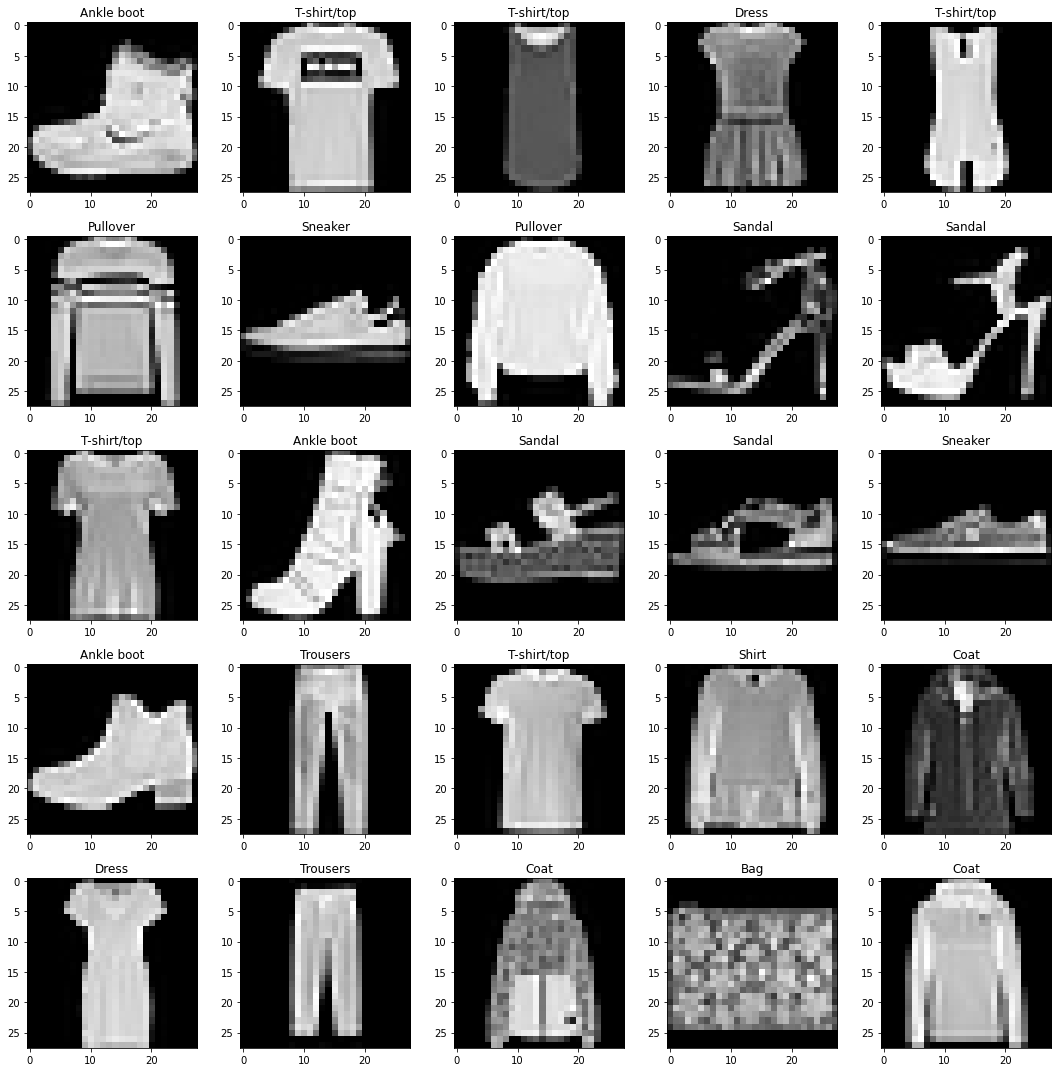

In [38]:
#이미지 확인
import matplotlib.pyplot as plt

plt.figure(figsize= (15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap ='gray')
    plt.title(class_names[y_train[i]])
    
plt.tight_layout()
plt.show()

In [39]:
X_train[0].shape

(28, 28)

In [40]:
class_names[y_train[0]]

'Ankle boot'

In [41]:
# 하이퍼 파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 50
N_BATCHS = 100

N_CLASS = 10 #CLASS CATEGORY의 개수
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]
IMAGE_SIZE = 28 # WIDTH와 HEIGHT 가다를경우 튜플로 지정하면됨 ... 



In [42]:
# 데이터 전처리
# X(이미지) : 0~255 => 0~1 사이 실수로 바꿈

X_train = X_train/255
X_test = X_test/255

# y (labael)  --> 다중분류 : OneHotEncoding// label인코딩이 되어있는데 다중분류를 하기 위해서 Ohe 을 했다.
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [43]:
np.max(X_train),np.min(X_train)

(1.0, 0.0)

In [47]:
X_train[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [45]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
#Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder = True)\
                               .repeat()

In [58]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(N_BATCHS)

In [60]:
# 이런식으로 할 수도 있다.
# from tensorflow.keras.layers import Flatten,Dense,Input

# model.add(Input((28,28)))
# model.add(Dense(...))

In [64]:

def create_model():
    model = keras.Sequential()
    #입력측(Input layer)
    model.add(keras.layers.Input((28,28)))
   #model.add(keras.layers.Input((28*28,))) 직접해줄수도 있다.// flatten이 된상태로 넣어준것...
    model.add(keras.layers.Flatten()) # 1개의 데이터가 2차원인데 1차원 vector로 넣어 줘야 하기때문에..
   #model.add(keras.layers.Flatten(Input_shape=(28,28))) 이렇게 합칠수도 있다.
    
    #은닉층(Hidden layer) : layer개수 , units개수 튜닝의 대상이다.
    # units 개수는 다똑같이 줘도 되지만 작게 만들어주는게 일반적이다....
    model.add(keras.layers.Dense(units = 256, activation ='relu'))
    model.add(keras.layers.Dense(units = 128, activation ='relu'))
    model.add(keras.layers.Dense(units = 64, activation ='relu'))
    
    #출력층(Outputlayer)
    model.add(keras.layers.Dense(N_CLASS, activation ='softmax')) # 10개의 값이 출력될때 확률로 나온다.0일확률,1일확률.....9일확률
                                                                    # 다중분류일때 : untis - class category개수, activation-softmax = 각class별확률
    
    
    # 컴파일 - 다중분류 :loss = 'categorycal_crossentropy'(y를 원핫인코딩 한경우), 
    #                         'sparse_categorical_entropy'(y를 원핫인코딩을 안한경우// 내부적으로 원핫인코딩을 해서 작동한다...)
    model.compile(optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss = 'categorical_crossentropy',
                  metrics =['accuracy'])
    
    
    return model

In [66]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


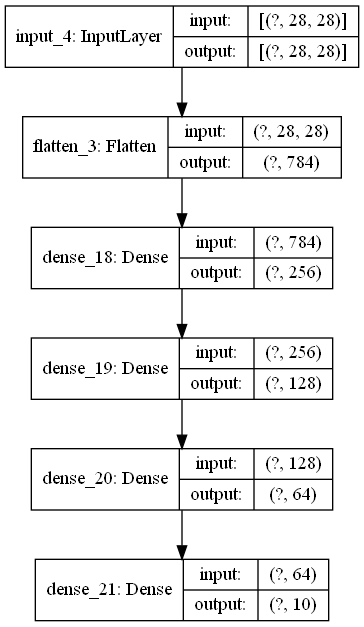

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file ='fashion_mnist_model.png', show_shapes = True)

In [ ]:
# !pip install pydot pydotplus graphviz

In [69]:
# 학습
## 에폭당 steps계산

steps_per_epoch = N_TRAIN //N_BATCHS # 배치 짜투리 사용안하고 버릴거라서....
validation_steps = int(np.ceil(N_TEST / N_BATCHS))  # 검증할때는 짜투리까지 써서...함 // 정수로 넣어줘야하고..

In [70]:
steps_per_epoch,validation_steps

(600, 100)

In [71]:
# 학습

history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

# 똑같이 정답을 맞추더라도 확률상 다르게 맞출 수 있어서 정확성은 더높아도 loss가 높아질수 있다.~~~~!

Train for 600 steps, validate for 100 steps
Epoch 1/50
600/600 [==============================] - 4s 7ms/step - loss: 0.5103 - accuracy: 0.8181 - val_loss: 0.4141 - val_accuracy: 0.8532
Epoch 2/50
600/600 [==============================] - 3s 6ms/step - loss: 0.3662 - accuracy: 0.8664 - val_loss: 0.3931 - val_accuracy: 0.8584
Epoch 3/50
600/600 [==============================] - 4s 6ms/step - loss: 0.3271 - accuracy: 0.8806 - val_loss: 0.3550 - val_accuracy: 0.8717
Epoch 4/50
600/600 [==============================] - 4s 6ms/step - loss: 0.3055 - accuracy: 0.8870 - val_loss: 0.3450 - val_accuracy: 0.8759
Epoch 5/50
600/600 [==============================] - 4s 6ms/step - loss: 0.2846 - accuracy: 0.8939 - val_loss: 0.3680 - val_accuracy: 0.8603
Epoch 6/50
600/600 [==============================] - 4s 6ms/step - loss: 0.2705 - accuracy: 0.8984 - val_loss: 0.3277 - val_accuracy: 0.8820
Epoch 7/50
600/600 [==============================] - 4s 7ms/step - loss: 0.2554 - accuracy: 0.9036 - va

In [72]:
# 평가 - testset
model.evaluate(val_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.8962


[0.5256481019034982, 0.8962]

In [73]:
# 결과를 시각화 : loss와 지정한 평가지표('accuracy')의 epoch당 변화 시각화. -> 선그래프

In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

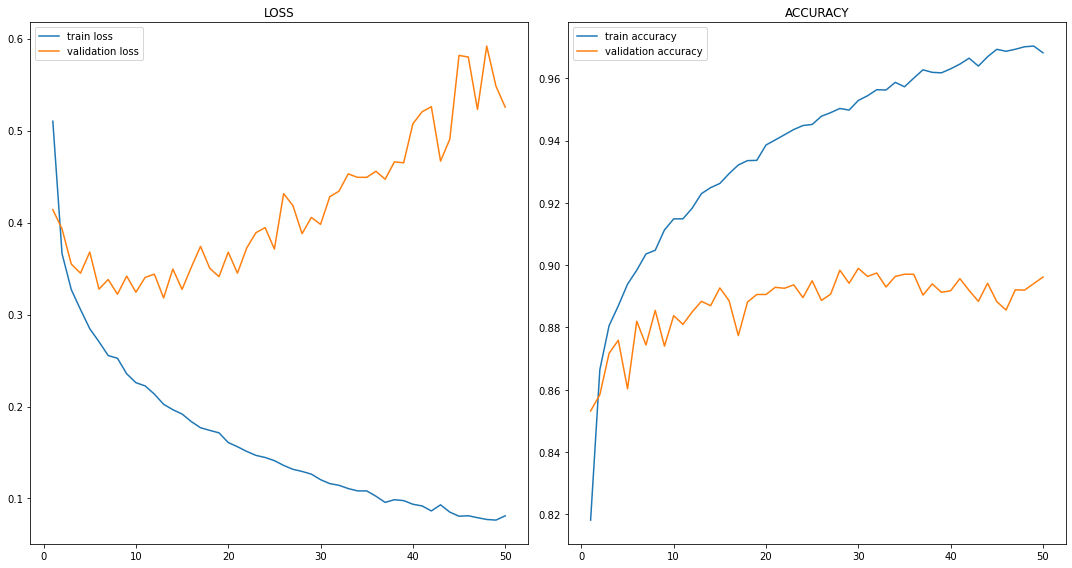

In [80]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)

plt.plot(range(1,N_EPOCHS+1), history.history['loss'], label ='train loss')
plt.plot(range(1,N_EPOCHS+1), history.history['val_loss'], label ='validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)

plt.plot(range(1,N_EPOCHS+1), history.history['accuracy'], label ='train accuracy')
plt.plot(range(1,N_EPOCHS+1), history.history['val_accuracy'], label ='validation accuracy')
plt.title('ACCURACY')

plt.legend()
plt.tight_layout()
plt.show()

# 벨리데이션 loss가 떨어지다가 높아진다 높아지기 시작한부분이 과적합 시작 ... 파라미터 조절을 통해 해결해야한다.

##  IMDB 감성분석
### 이진 분류(Binary Classification)
- 영화 댓글 - 부정(0),긍정(1)

In [3]:
import pickle
# 영일님이 보낸걸로도 해보기 
# 데이터 로드 
with open('imdb_dataset/x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
    
with open('imdb_dataset/x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('imdb_dataset/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('imdb_dataset/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [4]:
X_train[0]

'day lead think even re think boy young men do do commit mutual suicide slaughter classmate capture be bizarre mode be human have decide withdraw common civility order define own mutual world couple destruction be not perfect movie give money time filmmaker actor have be remarkable product term explain motif action young suicide murderer be well elephant term be film get rationalistic skin be far far good film almost anything be likely see flawed honest terrible honesty'

In [5]:
y_train[:5]

array([1, 0, 1, 0, 0])

In [6]:
# X -> 벡터화(숫자 변경)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 10000)
tfidf.fit(X_train+X_test)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
X_train_tfidf.shape

(25000, 10000)

In [8]:
X_train_tfidf # tensorflow에서는 넘파이 배열로 바꿔서 사용해야함..// sklearn은 그냥 사용..

<25000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2299041 stored elements in Compressed Sparse Row format>

In [14]:
# 하이퍼파라미터 설정
LEARNING_RATE =0.001
N_EPOCH = 10
N_BATCHS =50

N_TRAIN = X_train_tfidf.shape[0]
N_TEST = X_test_tfidf.shape[0]
N_FEATURE = X_train_tfidf.shape[1] # Input layers에 쓰려고 함..



In [15]:
#Dataset 생성 : 이진 분류 이기때문에 y값 ohe 안했음
# Sparse Matrix --> ndarray 로 바꿔줘야함...
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tfidf.toarray(),y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder= True)\
                               .repeat()


val_dataset = tf.data.Dataset.from_tensor_slices((X_test_tfidf.toarray(),y_test)).batch(N_BATCHS)

In [16]:
def create_model():
    model = keras.Sequential()
    #input layer
    model.add(keras.layers.Input((N_FEATURE, )))
    #Hidden layer
    model.add(keras.layers.Dense(512, activation= 'relu'))
    model.add(keras.layers.Dense(256, activation= 'relu'))
    model.add(keras.layers.Dense(256, activation= 'relu'))
    model.add(keras.layers.Dense(128, activation= 'relu'))
    
    #Output layer : 이진 분류 일때 --> units =1 , activation = 'sigmoid':logistic함수
    model.add(keras.layers.Dense(1, activation ='sigmoid')) # 예측값이 1개가나오고 , sigmoid 는 확률이 0.5 이상이나 이하냐 로 값을 판단하니까 
    
    # 컴파일 - activation :sigmoid --> loss : binary_crossentropy
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                  loss ='binary_crossentropy',
                  metrics =['accuracy'])
    return model

In [17]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 5,350,657
Trainable params: 5,350,657
Non-trainable params: 0
_________________________________________________________________


In [19]:
N_FEATURE*512+512

5120512

In [20]:
plot_model(model, show_shapes=True)

NameError: name 'plot_model' is not defined

In [24]:
# 학습 

steps_per_epoch = N_TRAIN//N_BATCHS
validation_step = int(np.ceil(N_TEST/N_BATCHS))


In [25]:
history = model.fit(train_dataset,
                  epochs = N_EPOCH,
                  steps_per_epoch = steps_per_epoch,
                  validation_data = val_dataset,
                  validation_steps = validation_step)

Train for 500 steps, validate for 500 steps
Epoch 1/10
500/500 [==============================] - 64s 128ms/step - loss: 0.0976 - accuracy: 0.9666 - val_loss: 0.5061 - val_accuracy: 0.8362
Epoch 2/10
500/500 [==============================] - 65s 130ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.8195 - val_accuracy: 0.8464
Epoch 3/10
500/500 [==============================] - 65s 131ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 1.2657 - val_accuracy: 0.8341
Epoch 4/10
500/500 [==============================] - 66s 131ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 1.0856 - val_accuracy: 0.8496
Epoch 5/10
500/500 [==============================] - 66s 132ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 1.1477 - val_accuracy: 0.8425
Epoch 6/10
500/500 [==============================] - 69s 137ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 1.3154 - val_accuracy: 0.8456
Epoch 7/10
500/500 [==============================] - 67s 133ms/step - loss: 0.0056 - 

In [26]:
#평가
model.evaluate(val_dataset)

500/500 [==============================] - 12s 25ms/step - loss: 1.7473 - accuracy: 0.8476


[1.7473127267956734, 0.84764]

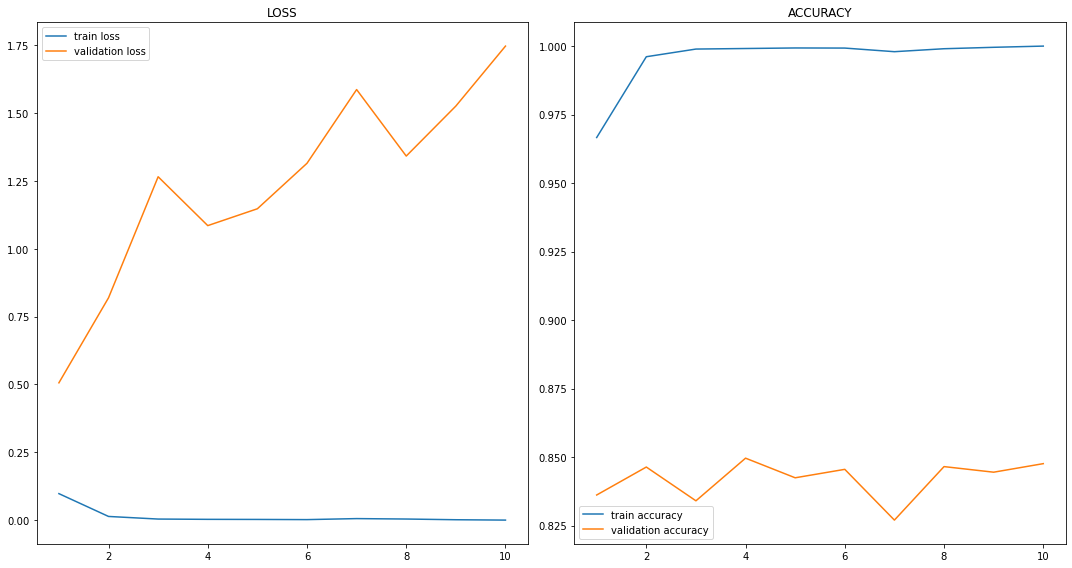

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)

plt.plot(range(1,N_EPOCH+1), history.history['loss'], label ='train loss')
plt.plot(range(1,N_EPOCH+1), history.history['val_loss'], label ='validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)

plt.plot(range(1,N_EPOCH+1), history.history['accuracy'], label ='train accuracy')
plt.plot(range(1,N_EPOCH+1), history.history['val_accuracy'], label ='validation accuracy')
plt.title('ACCURACY')

plt.legend()
plt.tight_layout()
plt.show()

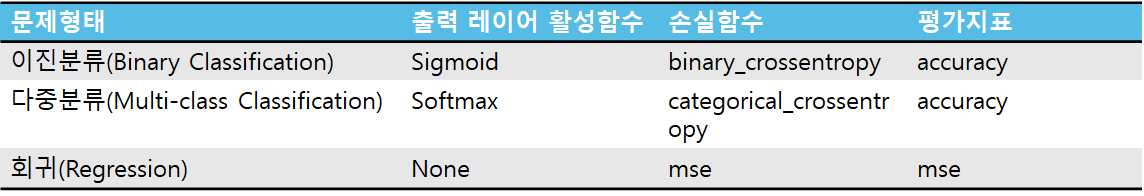

### DNN 순서 정리
1. 데이터를 읽어온다. tf.data.Dataset.from_tensor(())
2. 데이터 전처리.. 한다. 필요없으면 생략
3. 하이퍼파라미터 설정
4. 데이터 API 파이프라인을 이용하여 train_dataset , val_dataset을 만든다.
5. 모델을 만들 함수를 만들다. create_model()
6. 함수를 이용하여 모델 객체생성하고 모델에 train_dataset을 fit(학습)한다.
7. 평가(evaluate)를 하고 그래프를 그려서 과소적합, 과대적합을 확인 후 하이퍼 파라미터를 조절한다.

#### 이진분류 
- 출력 레이어 : units =1, activation = 'sigmoid'
- compile(optimizer = Adam, loss = binary_crossentropy, metrics = ['accuracy'])

#### 다중 분류
- 출력레이어 : units= class 개수, activation ='Softmax'
- compile(optimizer = Adam, loss = categorical_crossentropy, metrics =['accuracy'])
#### 회귀

- 출력레이어 : units = 1 --> 활성함수 사용 안함
- compile(optimizer = Adom, loss= mse)  --> 평가지표도 mse를 사용하기 때문에 따로 설정하지 않음..